<a href="https://colab.research.google.com/github/lfmarin/clases-ia/blob/main/Tutorial_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
entradas, salidas = make_blobs(centers=2)


In [3]:
entradas[:5]

array([[ 5.35379488,  1.49912778],
       [ 3.61956416,  1.74355888],
       [-5.1761183 , -0.99219031],
       [-3.70528458, -0.18002   ],
       [-5.28515596,  2.22675026]])

In [4]:
salidas.shape
salidas

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

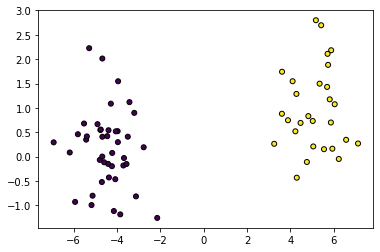

In [5]:
plt.scatter(entradas[:70, 0],entradas[:70,1], marker="o", c=salidas[:70],s=25, edgecolors="k")


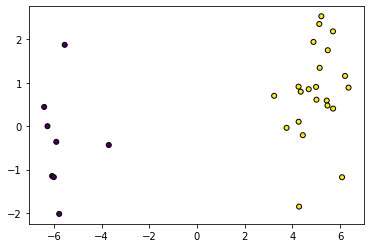

In [6]:
plt.scatter(entradas[70:, 0],entradas[70:,1], marker="o", c=salidas[70:],s=25, edgecolors="k")

In [7]:
X_train = entradas[:70]
y_train = salidas[:70]
X_test = entradas[70:]
y_test = salidas[70:]

In [28]:
modelo = Sequential()

modelo.add(Dense(2, input_dim=2, activation="sigmoid"))
modelo.add(Dense(2, activation="sigmoid"))
modelo.add(Dense(1, activation="sigmoid"))

modelo.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])

In [9]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = modelo.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 74ms/step - loss: 0.2110 - accuracy: 0.6000 - val_loss: 0.2454 - val_accuracy: 0.2667
Epoch 2/200
3/3 [==============================] - 0s 14ms/step - loss: 0.2105 - accuracy: 0.6000 - val_loss: 0.2454 - val_accuracy: 0.2667
Epoch 3/200
3/3 [==============================] - 0s 13ms/step - loss: 0.2101 - accuracy: 0.6000 - val_loss: 0.2452 - val_accuracy: 0.2667
Epoch 4/200
3/3 [==============================] - 0s 14ms/step - loss: 0.2098 - accuracy: 0.6000 - val_loss: 0.2450 - val_accuracy: 0.2667
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 0.2094 - accuracy: 0.6000 - val_loss: 0.2448 - val_accuracy: 0.2667
Epoch 6/200
3/3 [==============================] - 0s 14ms/step - loss: 0.2090 - accuracy: 0.6000 - val_loss: 0.2448 - val_accuracy: 0.2667
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 0.2086 - accuracy: 0.6000 - val_loss: 0.2448 - val_accuracy: 0.2667
Epoch 8/200
3/3 [===

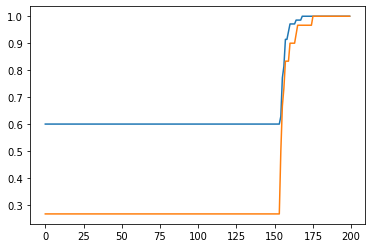

In [30]:
import pandas as pd

datos = pd.DataFrame(history.history)
datos.accuracy.plot()
datos.val_accuracy.plot()

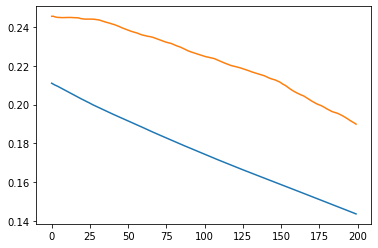

In [31]:
datos.loss.plot()
datos.val_loss.plot()

In [22]:
import numpy as np
resultados=modelo.predict(np.array([X_test[5],]))
#resultados[10]
#X_test[10]
y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1])

In [23]:
resultados

array([[0.29936844]], dtype=float32)